Лабораторна робота №6

Баш Анастасія 
МІТ-31

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Завдання №1 Завантажте набір даних MNIST:


Використовуйте TensorFlow або інші джерела для отримання набору даних.

In [2]:
# Завантаження та підготовка набору даних MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 30s 3us/step


Завдання №2 Підготуйте дані для тренування:



Нормалізуйте зображення та розділіть їх на тренувальні та тестувальні набори.

In [3]:
# Нормалізація значень пікселів до діапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

Завдання №3 Створіть нейронну мережу:

Розробіть нейронну мережу з використанням повнозвязних шарів.
Визначте архітектуру мережі: кількість шарів, нейронів, типи активаційних функцій.

In [4]:
# Визначення архітектури нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Плоский шар для зображення 28x28
    layers.Dense(128, activation='relu'),      # Повнозв'язний шар з ReLU активацією
    layers.Dropout(0.2),                       # Dropout для уникнення перенавчання
    layers.Dense(10, activation='softmax')     # Вихідний шар для 10 класів з softmax активацією
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Завдання №4
Тренуйте модель:

Навчіть модель на тренувальному наборі даних.

In [7]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0651 - accuracy: 0.9793 - val_loss: 0.0748 - val_accuracy: 0.9784
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0757 - val_accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9840 - val_loss: 0.0672 - val_accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9858 - val_loss: 0.0681 - val_accuracy: 0.9799


Завдання №5 Оцініть ефективність моделі:


Використовуйте тестувальний набір даних для оцінки точності моделі.

In [10]:
# Оцінка точності моделі на тестовому наборі
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 0s 855us/step - loss: 0.0681 - accuracy: 0.9799
Test Accuracy: 0.9799000024795532


Візуалізуйте деякі результати класифікації.

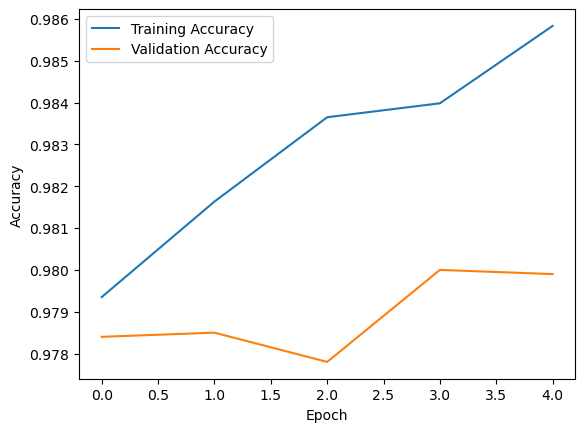

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

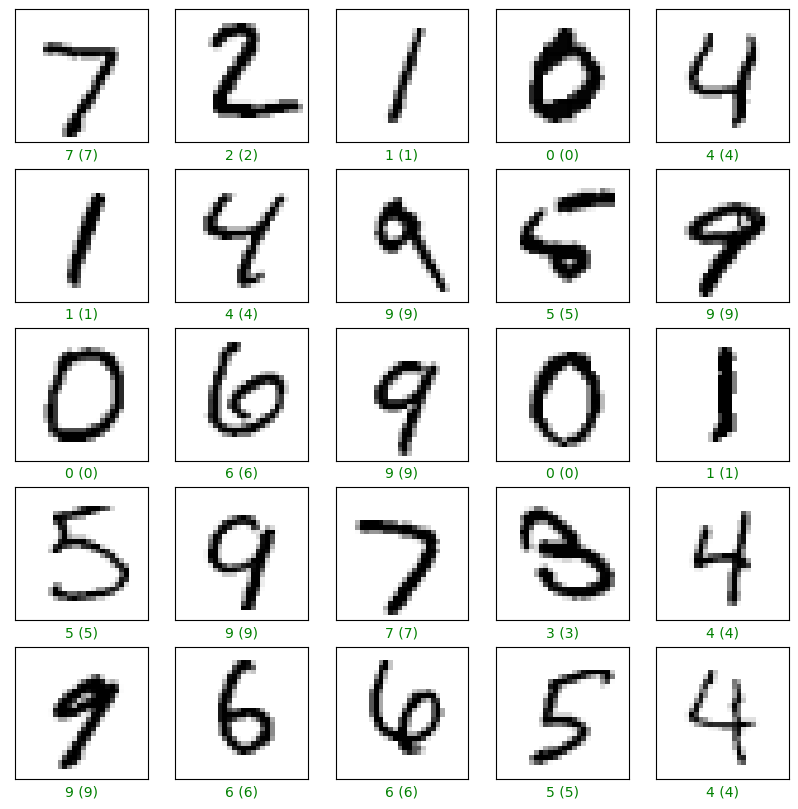

In [12]:
# Візуалізація деяких результатів класифікації
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)

plt.show()